In [5]:
##mengimport library
import matplotlib.pyplot as plt
import numpy as np
import math

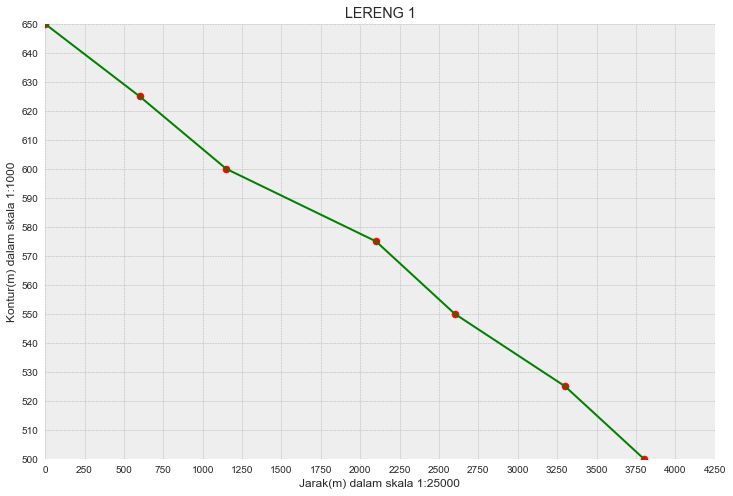

In [6]:
##LERENG 1
x1 = [0, 2.4, 4.6, 8.4, 10.4, 13.2, 15.2]
y1 = [650, 625, 600, 575, 550, 525, 500]
n1 = len(x1)
s1 = []

#mengubah jarak dari cm ke meter dengan skala 1:25000
for i in range (n1):
    jarak1 = (x1[i] * 25000 / 100)
    s1.append(jarak1)

    
#memplotkan hasil
plt.style.use('bmh')
plt.figure(figsize=(12,8))
plt.plot(s1,y1,c='Green')
plt.scatter(s1,y1,c='Red',s=50)
plt.xlim([0,4250])
plt.ylim([500,650])
plt.xticks(np.arange(0,4500,250))
plt.yticks(np.arange(500,660,10))
plt.title('LERENG 1')
plt.xlabel('Jarak(m) dalam skala 1:25000')
plt.ylabel('Kontur(m) dalam skala 1:1000')
plt.show()

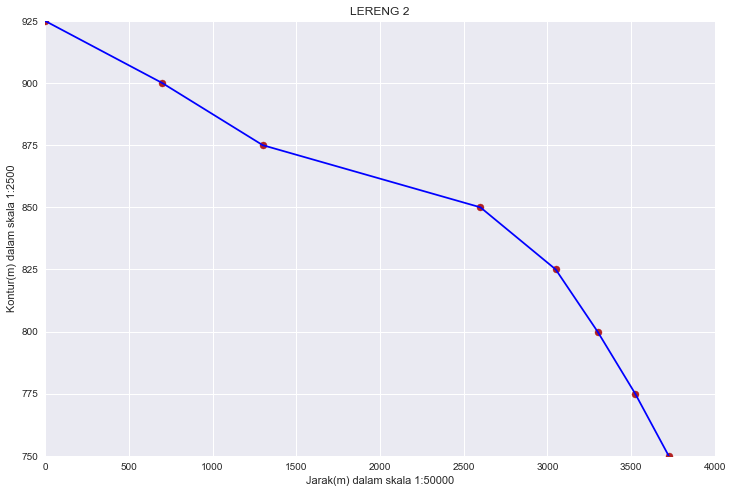

In [7]:
##LERENG 2
x2 = [0, 1.4, 2.6, 5.2, 6.1, 6.6, 7.05, 7.45]
y2 = [925, 900, 875, 850, 825, 800, 775, 750]
n2 = len(x2)
s2 = []

#mengubah jarak dari cm ke meter dengan skala 1:50000
for i in range (n2):
    jarak2 = (x2[i] * 50000 / 100)
    s2.append(jarak2)

plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.plot(s2,y2,c='Blue')
plt.scatter(s2,y2,c='Firebrick', s=50)
plt.xlim([0,40])
plt.ylim([750,925])
plt.xticks(np.arange(0,4500,500))
plt.yticks(np.arange(750,950,25))
plt.title('LERENG 2')
plt.xlabel('Jarak(m) dalam skala 1:50000')
plt.ylabel('Kontur(m) dalam skala 1:2500')
plt.show()

Nilai Fs pada F Trial 0.5 = 0.7169707596990537
Nilai Fs pada F Trial 1 = 0.9228490948946408
Nilai Fs pada F Trial 1.5 = 1.0306228537863864
Nilai Fs pada F Trial 2 = 1.0983105573943668
Nilai Fs pada F Trial 2.5 = 1.1451594552104725
 
Plot Hasil FoS dengan Metode Simplified Bishop:


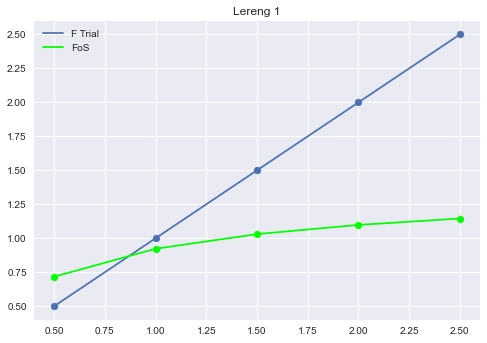

In [5]:
densitas = 2400          #Densitas Mudstone
phi = 29                 #Sudut gesek Mudstone
c = 15                   #Kohesi Mudstone
h_lereng1 = [ 0, 21, 27, 35, 41,                     #Tinggi sisi Slice
              45, 48, 52, 53, 53.5,
              54.5, 54, 54.5, 54, 54.5,
              55, 56, 56.5, 57, 57,
              58, 58, 58, 57.5, 57.5,
              57, 57, 56.5, 54, 48.5, 
              46, 43.5, 40.5, 38, 35,
              32.5, 29, 26, 24.5, 22.5,
              19, 15.5, 10, 6.5, 0      ]
b = [ 75, 50, 75, 100, 75,                           #Lebar Slice
      100, 125, 100, 50, 75, 
      50, 125, 75, 75, 100,
      50, 100, 75, 75, 50,
      75, 75, 75, 75, 100,
      50, 50, 100, 150, 75,
      75, 100, 100, 150, 75,
      150, 100, 50, 75, 75,
      75, 125, 75, 125        ]
alpha = [ 76, 75.5, 73, 69, 68,                      #Sudut Slice
          64, 60, 56.5, 52.5, 51.5,
          49, 47, 45.5, 44.5, 42,
          40.5, 39.5, 38, 36.5, 35,
          33, 32.5, 31, 30, 29,
          27.5, 26.5, 25, 24, 23,
          20, 18.5, 18, 16.5, 14,
          12, 10.5, 10, 9, 7,
          6.5, 6, 5, 4              ]
havg = []                 #Tinggi rata-rata
A = []                    #Luas
W = []                    #Berat
fd = []                   #W x sin alpha
fr = []                   #cb + W tan phi
malpha1 = []
malpha2 = []
malpha3 = []
malpha4 = []
malpha5 = []
calc_f1 = []
calc_f2 = []
calc_f3 = []
calc_f4 = []
calc_f5 = []

##mencari tinggi rata-rata
for i in range (len(h_lereng1)):
    if i <= 43:
        h = ((h_lereng1[i] + h_lereng1[i+1]) / 2)
        havg.append(h)
    else:
        None     

##mencari luas (A)
for i in range (len(havg)):
    area = havg[i] * b[i]
    A.append(area)

##mencari berat slices (W)
for i in range (len(A)):
    weight = A[i] * densitas
    W.append(weight)

##mencari W x sin alpha (driving force)
for i in range (len(W)):
    driving_force = W[i]* math.sin(math.radians(alpha[i]))
    fd.append(driving_force)

##mencari cb + W tan phi (gaya tahan)
for i in range (len(W)):
    gaya_tahan = (c*b[i]) + (W[i]*math.tan(math.radians(phi)))
    fr.append(gaya_tahan)
    
##melakukan F trial
for i in range (len(alpha)):
    fs1 = (math.cos(math.radians(alpha[i]))) + ((math.tan(math.radians(phi)) * math.sin(math.radians(alpha[i])))/0.5)
    fs2 = (math.cos(math.radians(alpha[i]))) + ((math.tan(math.radians(phi)) * math.sin(math.radians(alpha[i])))/1)
    fs3 = (math.cos(math.radians(alpha[i]))) + ((math.tan(math.radians(phi)) * math.sin(math.radians(alpha[i])))/1.5)
    fs4 = (math.cos(math.radians(alpha[i]))) + ((math.tan(math.radians(phi)) * math.sin(math.radians(alpha[i])))/2)
    fs5 = (math.cos(math.radians(alpha[i]))) + ((math.tan(math.radians(phi)) * math.sin(math.radians(alpha[i])))/2.5)
    
    malpha1.append(fs1)
    malpha2.append(fs2)
    malpha3.append(fs3)
    malpha4.append(fs4)
    malpha5.append(fs5)

for i in range (len(fr)):
    f_trial1 = fr[i] / malpha1[i]
    f_trial2 = fr[i] / malpha2[i]
    f_trial3 = fr[i] / malpha3[i]
    f_trial4 = fr[i] / malpha4[i]
    f_trial5 = fr[i] / malpha5[i]
    
    calc_f1.append(f_trial1) 
    calc_f2.append(f_trial2) 
    calc_f3.append(f_trial3) 
    calc_f4.append(f_trial4)
    calc_f5.append(f_trial5)

fs1 = sum(calc_f1)/sum(fd)
fs2 = sum(calc_f2)/sum(fd)
fs3 = sum(calc_f3)/sum(fd)
fs4 = sum(calc_f4)/sum(fd)
fs5 = sum(calc_f5)/sum(fd)
print("Nilai Fs pada F Trial 0.5 =", fs1)
print("Nilai Fs pada F Trial 1 =", fs2)
print("Nilai Fs pada F Trial 1.5 =", fs3)
print("Nilai Fs pada F Trial 2 =", fs4)
print("Nilai Fs pada F Trial 2.5 =", fs5)
print(' ')

##memplotkan hasil
ftrial = [0.5, 1, 1.5, 2, 2.5]
fos = [fs1, fs2, fs3, fs4, fs5]

print('Plot Hasil FoS dengan Metode Simplified Bishop:')

plt.style.use('seaborn')
plt.plot(ftrial, ftrial, label='F Trial')
plt.scatter(ftrial, ftrial)
plt.plot(ftrial, fos, c='Lime', label='FoS')
plt.scatter(ftrial, fos, c='Lime')
plt.title('Lereng 1')
plt.legend(loc='best')
plt.show()

Nilai Fs pada F Trial 0.5 = 0.8132870478630619
Nilai Fs pada F Trial 1 = 1.0165785931902864
Nilai Fs pada F Trial 1.5 = 1.1185521361489823
Nilai Fs pada F Trial 2 = 1.180952782060095
Nilai Fs pada F Trial 2.5 = 1.2233618085431928
 
Plot Hasil FoS dengan Metode Simplified Bishop:


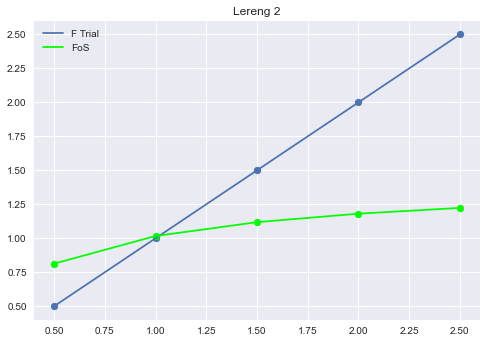

In [6]:
densitas = 2400          #Densitas Mudstone
phi = 29                 #Sudut gesek Mudstone
c = 15                   #Kohesi Mudstone
h_lereng2 = [ 0, 32.5, 42.5, 52.5, 62.5,                     #Tinggi sisi Slice
              65, 72.5, 75, 76.25, 77.5,
              77.5, 78.5, 80, 83.75, 85,
              87.5, 88.75, 90, 90, 92.5,
              91.25, 91.25, 91.25, 90, 83.75,
              80, 73.75, 72.5, 68.75, 57.5,
              48.75, 36.25, 25, 13.75, 0     ]
b = [ 150, 100, 100, 150, 50,                                #Lebar Slice
      150, 100, 150, 100, 100,
      50, 100, 100, 150, 150,
      50, 200, 100, 150, 100,
      150, 150, 50, 150, 50,
      150, 50, 50, 150, 50,
      100, 125, 75, 125       ]
alpha = [ 73, 70, 66, 62, 59,                                #Sudut Slice
          56, 54, 50, 48, 44,
          43.5, 39, 38, 35, 31,
          30.5, 29.5, 28, 26, 25,
          22, 20, 18, 17, 14,
          11.5, 11, 9.5, 9, 9,
          6.5, 4, 3, 1           ]
havg = []                 #Tinggi rata-rata
A = []                    #Luas
W = []                    #Berat
fd = []                   #W x sin alpha
fr = []                   #cb + W tan phi
malpha1 = []
malpha2 = []
malpha3 = []
malpha4 = []
malpha5 = []
calc_f1 = []
calc_f2 = []
calc_f3 = []
calc_f4 = []
calc_f5 = []

##mencari tinggi rata-rata
for i in range (len(h_lereng2)):
    if i <= 33:
        h = ((h_lereng2[i] + h_lereng2[i+1]) / 2)
        havg.append(h)
    else:
        None    

##mencari luas (A)
for i in range (len(havg)):
    area = havg[i] * b[i]
    A.append(area)

##mencari berat slices (W)
for i in range (len(A)):
    weight = A[i] * densitas
    W.append(weight)

##mencari W x sin alpha (driving force)
for i in range (len(W)):
    driving_force = W[i]* math.sin(math.radians(alpha[i]))
    fd.append(driving_force)

##mencari cb + W tan phi (gaya tahan)
for i in range (len(W)):
    gaya_tahan = (c*b[i]) + (W[i]*math.tan(math.radians(phi)))
    fr.append(gaya_tahan)
    
##melakukan F trial
for i in range (len(alpha)):
    fs1 = (math.cos(math.radians(alpha[i]))) + ((math.tan(math.radians(phi)) * math.sin(math.radians(alpha[i])))/0.5)
    fs2 = (math.cos(math.radians(alpha[i]))) + ((math.tan(math.radians(phi)) * math.sin(math.radians(alpha[i])))/1)
    fs3 = (math.cos(math.radians(alpha[i]))) + ((math.tan(math.radians(phi)) * math.sin(math.radians(alpha[i])))/1.5)
    fs4 = (math.cos(math.radians(alpha[i]))) + ((math.tan(math.radians(phi)) * math.sin(math.radians(alpha[i])))/2)
    fs5 = (math.cos(math.radians(alpha[i]))) + ((math.tan(math.radians(phi)) * math.sin(math.radians(alpha[i])))/2.5)
    
    malpha1.append(fs1)
    malpha2.append(fs2)
    malpha3.append(fs3)
    malpha4.append(fs4)
    malpha5.append(fs5)

for i in range (len(fr)):
    f_trial1 = fr[i] / malpha1[i]
    f_trial2 = fr[i] / malpha2[i]
    f_trial3 = fr[i] / malpha3[i]
    f_trial4 = fr[i] / malpha4[i]
    f_trial5 = fr[i] / malpha5[i]
    
    calc_f1.append(f_trial1) 
    calc_f2.append(f_trial2) 
    calc_f3.append(f_trial3) 
    calc_f4.append(f_trial4)
    calc_f5.append(f_trial5)

fs1 = sum(calc_f1)/sum(fd)
fs2 = sum(calc_f2)/sum(fd)
fs3 = sum(calc_f3)/sum(fd)
fs4 = sum(calc_f4)/sum(fd)
fs5 = sum(calc_f5)/sum(fd)
print("Nilai Fs pada F Trial 0.5 =", fs1)
print("Nilai Fs pada F Trial 1 =", fs2)
print("Nilai Fs pada F Trial 1.5 =", fs3)
print("Nilai Fs pada F Trial 2 =", fs4)
print("Nilai Fs pada F Trial 2.5 =", fs5)
print(' ')

##memplotkan hasil
ftrial = [0.5, 1, 1.5, 2, 2.5]
fos = [fs1, fs2, fs3, fs4, fs5]

print('Plot Hasil FoS dengan Metode Simplified Bishop:')

plt.style.use('seaborn')
plt.plot(ftrial, ftrial, label='F Trial')
plt.scatter(ftrial, ftrial)
plt.plot(ftrial, fos, c='Lime', label='FoS')
plt.scatter(ftrial, fos, c='Lime')
plt.title('Lereng 2')
plt.legend(loc='best')
plt.show()